## Importing Libraries

In [70]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

## Reading the data

In [72]:
bike = pd.read_csv('day.csv', index_col=0)

In [73]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [74]:
bike.shape

(730, 15)

## Data Preprocessing

In [75]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [76]:
bike.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Mapping integers in season column to respective season

In [77]:
def number_(x):
    return x.map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

bike['season']=bike[['season']].apply(number_)

In [78]:
bike["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

### Mapping integers in mnth column to respective month

In [79]:
def object_map(x):
    return x.map({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

bike['mnth']=bike[['mnth']].apply(object_map)

In [80]:
bike["mnth"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

### Mapping integers in weekday column to respective day

In [81]:
#No. of unique values in weekday column
bike['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [82]:
def str_map(x):
    return x.map({1 : 'wed', 2 : 'thu', 3 : 'fri', 4 : 'sat', 5 : 'sun', 6 : 'mon', 0 : 'tue'})

bike['weekday']=bike[['weekday']].apply(str_map)

In [83]:
bike["weekday"].value_counts()

wed    105
mon    105
tue    105
thu    104
sun    104
sat    104
fri    103
Name: weekday, dtype: int64

In [84]:
#No. of unique values in holiday column
bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [85]:
bike["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [86]:
bike["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [87]:
bike.loc[(bike["weathersit"]==1),"weathersit"]="A"
bike.loc[(bike["weathersit"]==2),"weathersit"]="B"
bike.loc[(bike["weathersit"]==3),"weathersit"]="C"
bike.loc[(bike["weathersit"]==4),"weathersit"]="D"

In [88]:
bike["weathersit"].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

## Data Visualization

In [89]:
numerical = bike.select_dtypes(include = ['int64', 'float64']).columns
numerical

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

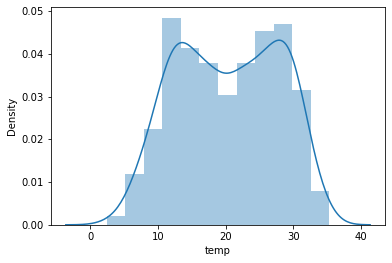

In [90]:
_= sns.distplot(bike["temp"])

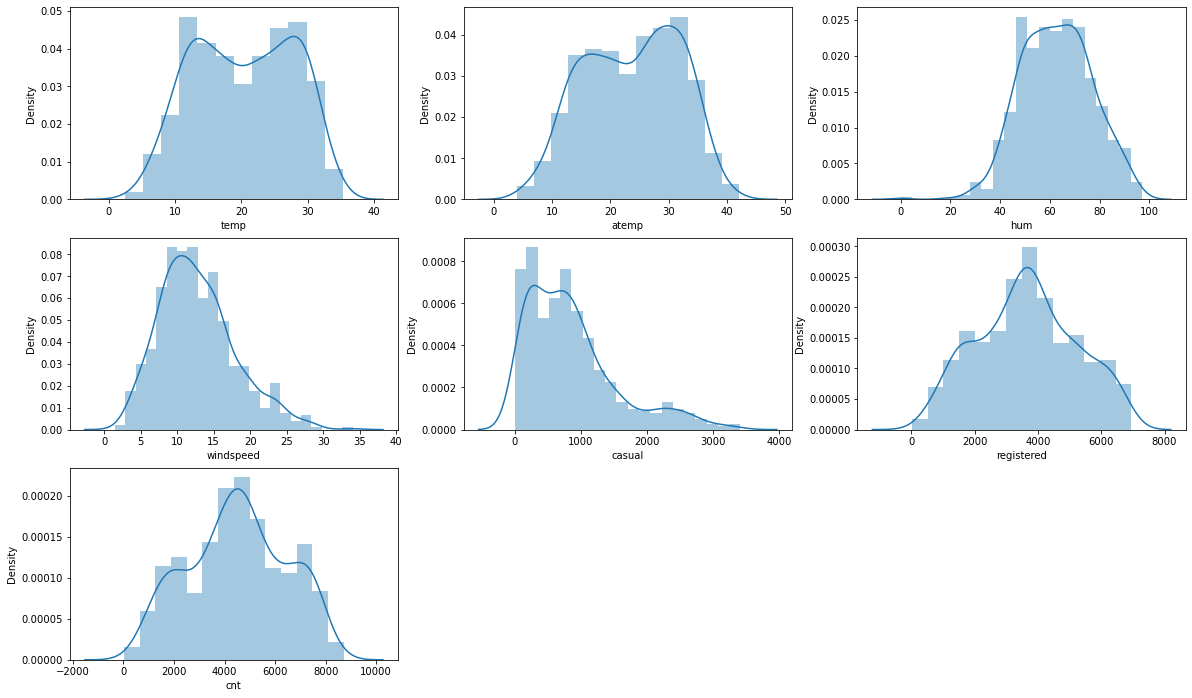

In [91]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.distplot(bike['temp'])
plt.subplot(3,3,2)
sns.distplot(bike['atemp'])
plt.subplot(3,3,3)
sns.distplot(bike['hum'])
plt.subplot(3,3,4)
sns.distplot(bike['windspeed'])
plt.subplot(3,3,5)
sns.distplot(bike['casual'])
plt.subplot(3,3,6)
sns.distplot(bike['registered'])
plt.subplot(3,3,7)
sns.distplot(bike['cnt'])
plt.show()

In [92]:
bike["dteday"]=bike["dteday"].astype('datetime64')

In [93]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [94]:
categorical = bike.select_dtypes(include = ['object'])

In [95]:
categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

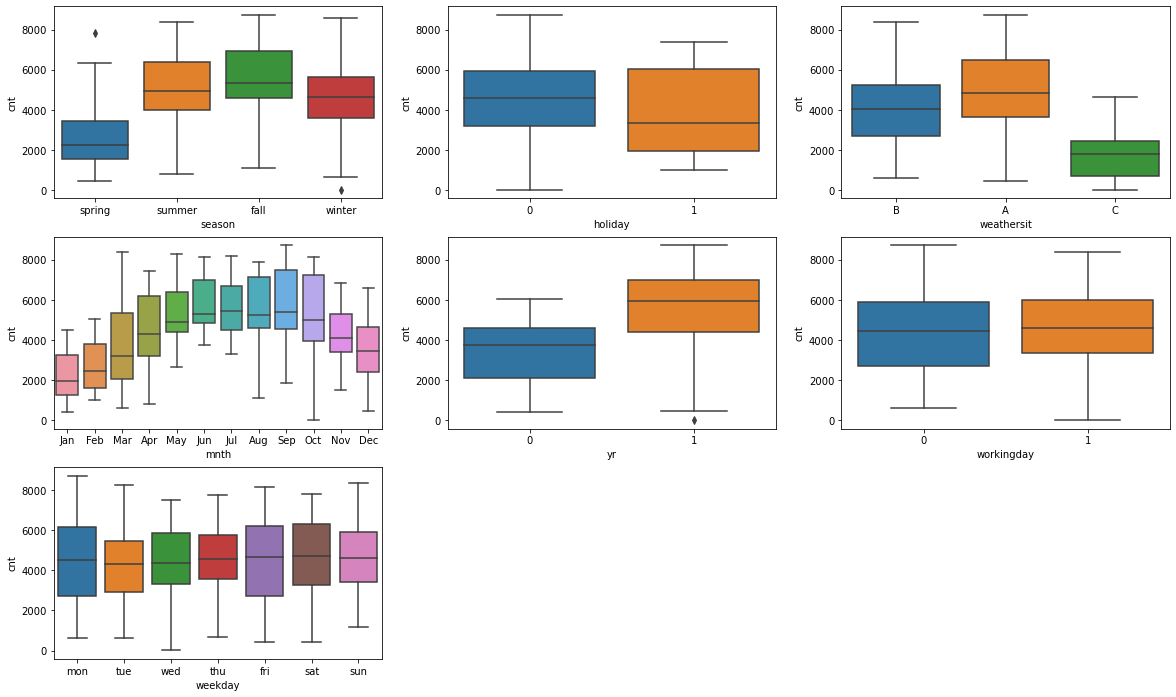

In [96]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

Insights:
1. There is more demand for bikes in Summer & Fall.
2. Bike demand is less in holidays.
3. Bike demand is most in Clear weather & least in Rainy weather.
4. January & February has less bike demands.
5. 2019 has seen a significant increase in bike demands than 2018.
6. Bike demand in working & non-working days are almost equal.
7. Median bike demand is almost equal in all weekdays.





In [97]:
numeric = bike.select_dtypes(include = ['int64', 'float64']).drop(['yr', 'holiday', 'workingday'], axis=1)
numeric.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

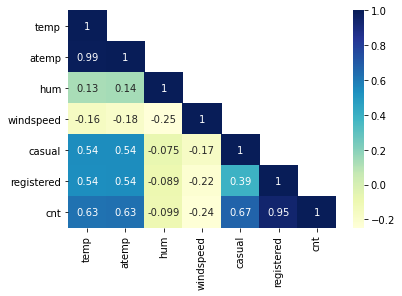

In [98]:
mask = np.array(numeric.corr())
mask[np.tril_indices_from(mask)]=False
_=sns.heatmap(numeric.corr(), mask=mask, annot=True, cmap='YlGnBu')

Insights:
1. atemp & temp are highly correlated.
2. Bike demand is negetively correlated with windspeed & humidity.
3. Bike demand is positively correlated with temperature.

In [99]:
numeric.drop('atemp', axis=1, inplace=True)

In [100]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 48.5+ KB


## Dummy Encoding

In [101]:
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [103]:
bike.drop(categorical.columns, axis=1, inplace=True)
bike.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [104]:
bike = pd.concat([bike, dummies], axis=1)
bike.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [105]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   atemp          730 non-null    float64       
 6   hum            730 non-null    float64       
 7   windspeed      730 non-null    float64       
 8   casual         730 non-null    int64         
 9   registered     730 non-null    int64         
 10  cnt            730 non-null    int64         
 11  season_spring  730 non-null    uint8         
 12  season_summer  730 non-null    uint8         
 13  season_winter  730 non-null    uint8         
 14  mnth_Aug       730 non-null    uint8         
 15  mnth_Dec       730 non-

In [106]:
bike.drop('atemp', axis=1, inplace=True)

In [107]:
bike.drop('dteday', axis=1, inplace=True)

In [108]:
#Separating the features and target variable
x = bike.drop('cnt', axis=1)
y = bike['cnt']

### Splitting train and test data

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### Scaling the data

In [110]:
scaler=MinMaxScaler()

In [111]:
x_train[['temp', 'hum', 'windspeed', 'casual', 'registered']] = scaler.fit_transform(x_train[['temp', 'hum', 'windspeed', 'casual', 'registered']])

In [112]:
x_test[['temp', 'hum', 'windspeed', 'casual', 'registered']] = scaler.transform(x_test[['temp', 'hum', 'windspeed', 'casual', 'registered']])

## Model building using Gradient Boost

In [113]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [114]:
model.score(x_test,y_test)

0.9955216691965473

In [115]:
model.score(x_train,y_train)

0.99902233796698

### Residual Analysis

In [116]:
y_train_pred = model.predict(x_train)
y_train_pred[:5]

array([7493.76004457, 7182.67988422, 4084.6625591 , 1691.09257629,
       4255.42309108])

In [117]:
Residual = y_train - y_train_pred

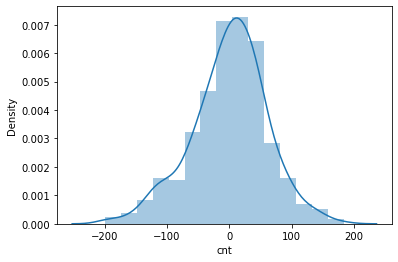

In [118]:
sns.distplot(Residual, bins =15)
plt.show()

### Predictions

In [119]:
y_pred = model.predict(x_test)
y_pred[:10]

array([6044.02417604, 6312.33400604, 2854.32024564, 4608.76231739,
       4912.25681404, 3869.19084177, 4375.50362733, 4843.93304989,
       5827.20491846, 4358.27417137])

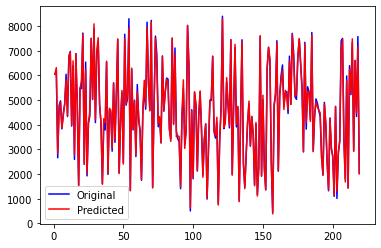

In [120]:
c = [i for i in range(1,220,1)]
plt.plot(c, y_test, color='Blue')
plt.plot(c, y_pred, color='Red')
plt.legend(['Original', 'Predicted'])
plt.show()

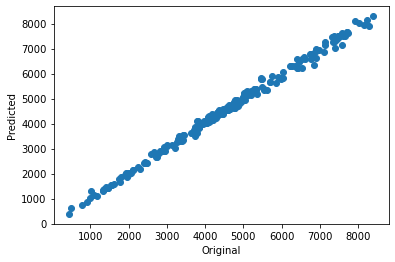

In [121]:
plt.scatter(y_test, y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

### Evaluation of model

In [122]:
r2_score(y_test,y_pred)

0.9955216691965473